# Advanced Learning Algorithm

## 1. Neural Network

Import Packages

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

Examples #1

In [4]:
# Dataset
x_train = np.array([[1.0],[2.0]],dtype=np.float32)
y_train = np.array([[300],[500]],dtype=np.float32)

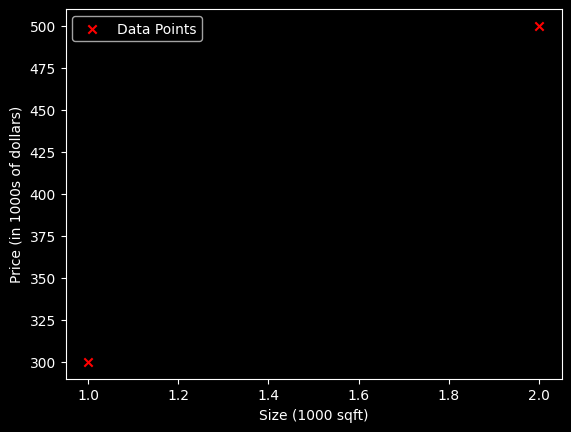

In [8]:
# Plot
plt.scatter(x_train,y_train,marker='x',c='r',label='Data Points')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (in 1000s of dollars)')
plt.legend()
plt.show()

Neuron with Regression/Linear Model

In [9]:
# Create Linear Layer
linear_layer = Dense(units=1,activation='linear')

In [11]:
# Examine the weights
linear_layer.get_weights()

[]

In [12]:
# Try the model on one example x_train
a1 = linear_layer(x_train[0].reshape(1,1))
a1

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.53003395]], dtype=float32)>

In [13]:
w, b = linear_layer.get_weights()
print(f'w = {w}, b = {b}')

w = [[-0.53003395]], b = [0.]


In [17]:
set_w = np.array([[200]])
set_b = np.array([100])

linear_layer.set_weights([set_w,set_b])

In [18]:
a1 = linear_layer(x_train[0].reshape(1,1))
a1

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[300.]], dtype=float32)>

In [19]:
alin = np.dot(x_train[0],set_w) + set_b
alin

array([300.])

In [20]:
y_pred = linear_layer(x_train)
y_pred

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[300.],
       [500.]], dtype=float32)>

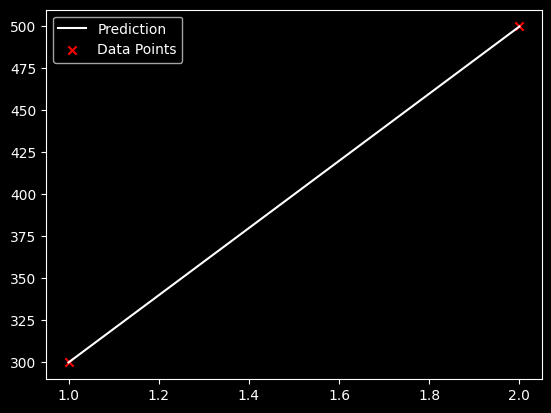

In [22]:
plt.plot(x_train,y_pred,c='white',label='Prediction')
plt.scatter(x_train,y_train,marker='x',c='r',label='Data Points')
plt.legend()
plt.show()

Neuron with Sigmoid Activation

Example 1

In [23]:
# Create Dataset
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

In [24]:
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

array([3., 4., 5.], dtype=float32)

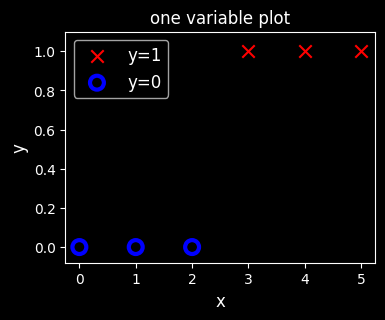

In [25]:
fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors='blue',lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [26]:
# Create Model
model = Sequential([
    Dense(units=1, input_dim=1, activation='sigmoid',name='L1')
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Create layer
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[0.09979141]] [0.]
(1, 1) (1,)


In [36]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
logistic_layer.set_weights([set_w,set_b])

y_pred = model.predict(X_train)
y_pred

1/1 [==============================] - 0s 33ms/step


array([[0.01098694],
       [0.07585818],
       [0.37754068],
       [0.8175745 ],
       [0.97068775],
       [0.99592984]], dtype=float32)

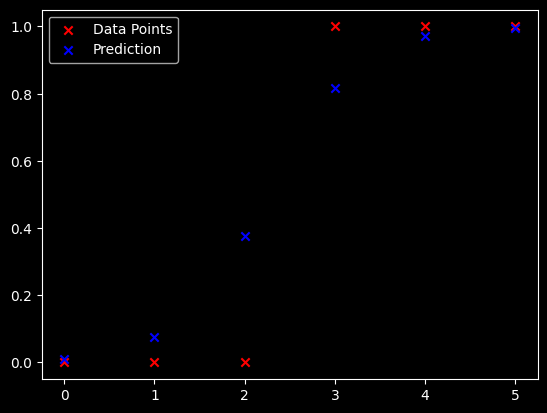

In [37]:
plt.scatter(X_train,Y_train,marker='x',c='r',label='Data Points')
plt.scatter(X_train,y_pred,marker='x',c='b',label='Prediction')
plt.legend()
plt.show()

In [39]:
y_pred2 = [1 if x > 0.5 else 0 for x in y_pred]
y_pred2

[0, 0, 0, 1, 1, 1]

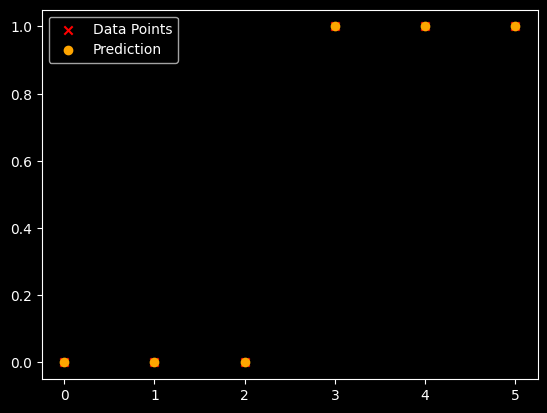

In [42]:
plt.scatter(X_train,Y_train,marker='x',c='r',label='Data Points')
plt.scatter(X_train,y_pred2,marker='o',c='orange',label='Prediction')
plt.legend()
plt.show()

Example 2

In [60]:
from tensorflow.keras.layers import Normalization

In [77]:
# Create Random Dataset
temp = np.random.randint(151,284,200) + np.random.rand(200)
temp.shape

(200,)

In [78]:
dur = np.random.randint(11,15,200) + np.random.rand(200)
dur.shape

(200,)

In [79]:
x_train = np.c_[temp, dur]
x_train

array([[215.62063743,  12.22140757],
       [170.7652665 ,  11.15322654],
       [229.4700599 ,  13.04953271],
       [168.94653139,  12.93861404],
       [195.16640043,  11.63906937],
       [197.94931604,  14.91201909],
       [257.82642685,  13.50516532],
       [256.39851312,  12.16299869],
       [283.80172   ,  14.3682592 ],
       [159.6414402 ,  13.00272073],
       [176.9607773 ,  14.55118731],
       [241.94676457,  12.17879145],
       [252.1956718 ,  11.92348019],
       [154.37121851,  14.4135934 ],
       [266.26280082,  14.86294366],
       [251.0195491 ,  14.46074781],
       [223.16423078,  11.13883004],
       [157.19805093,  12.62322869],
       [157.36330475,  14.40777877],
       [159.39205309,  13.55516048],
       [226.30253183,  11.63563551],
       [156.95247164,  14.79360411],
       [231.24397311,  13.11909364],
       [258.61246589,  14.84339074],
       [210.70706133,  11.62230157],
       [227.84294645,  12.75237976],
       [209.51372996,  11.39431844],
 

In [80]:
print(f"Temperature Max, Min pre normalization: {np.max(x_train[:,0]):0.2f}, {np.min(x_train[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(x_train[:,1]):0.2f}, {np.min(x_train[:,1]):0.2f}")


Temperature Max, Min pre normalization: 283.82, 152.42
Duration    Max, Min pre normalization: 14.98, 11.00


In [81]:
norm_1 = Normalization(axis=-1)
norm_1.adapt(x_train)
xn_train = norm_1(x_train)

In [82]:
print(f"Temperature Max, Min post normalization: {np.max(xn_train[:,0]):0.2f}, {np.min(xn_train[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(xn_train[:,1]):0.2f}, {np.min(xn_train[:,1]):0.2f}")

Temperature Max, Min post normalization: 1.64, -1.61
Duration    Max, Min post normalization: 1.79, -1.86


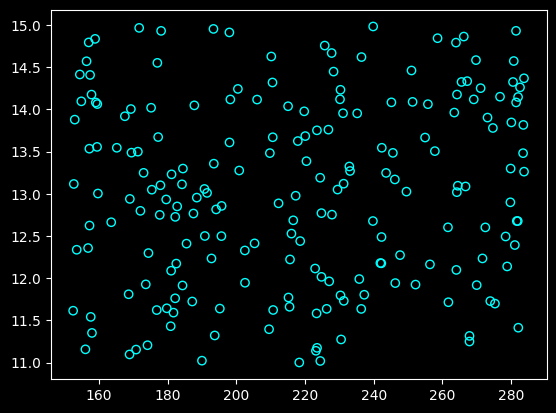

In [102]:
plt.scatter(temp,dur,marker='o',facecolor='None',edgecolors='cyan',lw=1)
plt.show()

In [134]:
x = np.arange(180,260,1)
y = (-3/80)*(temp-180) + 15

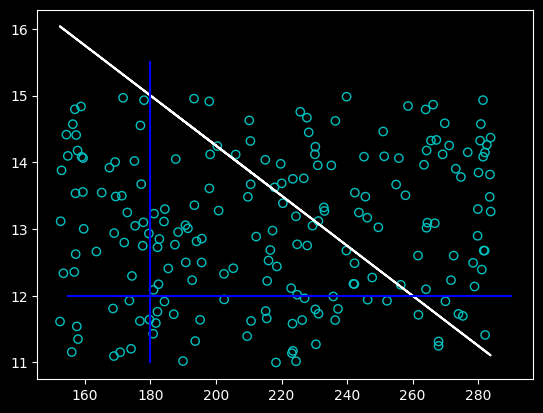

In [136]:
plt.scatter(temp,dur,marker='o',facecolor='None',edgecolor='c',lw=1)
plt.plot(temp,y,c='white')
plt.plot(np.zeros(2)+180,np.array([11,15.5]),c='blue')
plt.plot(np.array([155,290]),np.zeros(2)+12,c='blue')
plt.show()